In [36]:
import pandas as pd
import sklearn
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import xgboost
import numpy as np
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot
print(np.__version__)

1.16.5


In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


In [4]:
df.isnull().sum()

encounter_id                       0
patient_id                         0
hospital_id                        0
age                             4228
bmi                             3429
                               ...  
solid_tumor_with_metastasis      715
apache_3j_bodysystem            1662
apache_2_bodysystem             1662
Unnamed: 83                    91713
hospital_death                     0
Length: 85, dtype: int64

In [5]:
df.drop('Unnamed: 83', axis = 1, inplace = True)

In [6]:
df

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0


In [7]:
df.dropna(thresh = 42, inplace = True)

In [8]:
df

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0


In [9]:
df.dropna(thresh = 40000, axis = 1, inplace = True)

In [10]:
df

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0


In [11]:
df['age'].fillna((df['age'].mode()), inplace = True)
df

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0


In [12]:
y = df['hospital_death']
df.drop(['hospital_death'], axis = 1, inplace = True)
X = df

In [13]:
X

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [14]:
y

0        0
1        0
2        0
3        0
4        0
        ..
91708    0
91709    0
91710    0
91711    0
91712    0
Name: hospital_death, Length: 91581, dtype: int64

In [15]:
df.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91581.000000,91581.000000,91581.000000,87398.000000,88188.000000,91581.000000,90271.000000,91581.000000,91581.000000,88895.00000,...,83699.000000,83699.000000,90906.000000,90906.000000,90906.000000,90906.000000,90906.000000,90906.000000,90906.000000,90906.000000
mean,65610.976032,65545.876950,105.684531,62.309790,29.185614,0.183925,169.641784,508.415141,0.834864,84.02806,...,0.087643,0.044778,0.000858,0.015698,0.225299,0.012991,0.026192,0.007073,0.004136,0.020659
std,37797.472884,37809.490771,62.865165,16.774738,8.275326,0.387425,10.796629,229.034427,2.485995,25.01288,...,0.245778,0.215441,0.029280,0.124303,0.417781,0.113238,0.159706,0.083805,0.064180,0.142240
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.60000,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32851.000000,32839.000000,47.000000,52.000000,23.642040,0.000000,162.500000,369.000000,0.035417,66.80000,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65672.000000,65430.000000,109.000000,65.000000,27.654480,0.000000,170.100000,504.000000,0.138889,80.30000,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98346.000000,98301.000000,161.000000,75.000000,32.930150,0.000000,177.800000,680.000000,0.408333,97.10000,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.00000,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
cf = df.select_dtypes(include = [np.object])
for i in cf.columns:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i].astype(str))

C:\Users\ankit\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:33:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.00740
Feature: 1, Score: 0.00656
Feature: 2, Score: 0.00796
Feature: 3, Score: 0.01066
Feature: 4, Score: 0.00947
Feature: 5, Score: 0.02971
Feature: 6, Score: 0.01007
Feature: 7, Score: 0.00807
Feature: 8, Score: 0.00775
Feature: 9, Score: 0.01079
Feature: 10, Score: 0.00948
Feature: 11, Score: 0.00404
Feature: 12, Score: 0.00724
Feature: 13, Score: 0.00842
Feature: 14, Score: 0.00717
Feature: 15, Score: 0.00993
Feature: 16, Score: 0.00973
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00832
Feature: 19, Score: 0.01219
Feature: 20, Score: 0.01590
Feature: 21, Score: 0.00589
Feature: 22, Score: 0.01532
Feature: 23, Score: 0.00876
Feature: 24, Score: 0.00583
Feature: 25, Score: 0.00885
Feature: 26, Score: 0.00900
Fe

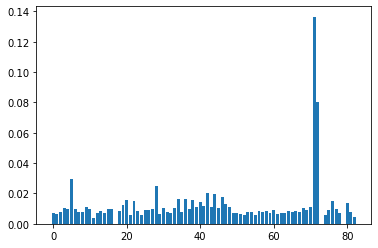

In [17]:
model = XGBClassifier()
model.fit(X, y)
importance = model.feature_importances_
a = []
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    if (v <= 0.01):
        a.append(i)
        
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [18]:
df.drop(df.columns[a], axis=1, inplace = True)
df

,age,elective_surgery,ethnicity,icu_admit_source,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,ventilated_apache,d1_diasbp_min,d1_heartrate_max,...,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,d1_glucose_min,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,hepatic_failure,immunosuppression,solid_tumor_with_metastasis
0,68.0,0,2,1,3.0,6.0,4.0,0.0,37.0,119.0,...,73.0,39.9,37.2,109.0,3.4,0.10,0.05,0.0,0.0,0.0
1,77.0,0,2,1,1.0,3.0,1.0,1.0,31.0,118.0,...,67.0,36.3,35.1,128.0,3.8,0.47,0.29,0.0,0.0,0.0
2,25.0,0,2,0,3.0,6.0,5.0,0.0,48.0,96.0,...,105.0,37.0,36.7,NaN,NaN,0.00,0.00,0.0,0.0,0.0
3,81.0,1,2,2,4.0,6.0,5.0,1.0,42.0,116.0,...,84.0,38.0,34.8,88.0,3.5,0.04,0.03,0.0,0.0,0.0
4,19.0,0,2,0,NaN,NaN,NaN,0.0,57.0,89.0,...,120.0,37.2,36.7,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.0,0,2,1,4.0,6.0,5.0,1.0,44.0,115.0,...,67.0,38.2,36.6,187.0,4.2,0.12,0.05,0.0,0.0,1.0
91709,56.0,0,2,1,4.0,6.0,5.0,0.0,40.0,100.0,...,65.0,37.4,36.1,177.0,3.8,0.03,0.02,0.0,0.0,0.0
91710,48.0,0,2,0,3.0,6.0,4.0,0.0,49.0,158.0,...,75.0,36.9,35.8,86.0,3.2,0.05,0.02,0.0,0.0,0.0
91711,NaN,0,2,0,4.0,5.0,4.0,0.0,32.0,82.0,...,111.0,36.5,36.3,NaN,NaN,0.07,0.02,0.0,0.0,0.0


In [19]:
df['age'].fillna((df['age'].median()), inplace = True)
df

,age,elective_surgery,ethnicity,icu_admit_source,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,ventilated_apache,d1_diasbp_min,d1_heartrate_max,...,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,d1_glucose_min,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,hepatic_failure,immunosuppression,solid_tumor_with_metastasis
0,68.0,0,2,1,3.0,6.0,4.0,0.0,37.0,119.0,...,73.0,39.9,37.2,109.0,3.4,0.10,0.05,0.0,0.0,0.0
1,77.0,0,2,1,1.0,3.0,1.0,1.0,31.0,118.0,...,67.0,36.3,35.1,128.0,3.8,0.47,0.29,0.0,0.0,0.0
2,25.0,0,2,0,3.0,6.0,5.0,0.0,48.0,96.0,...,105.0,37.0,36.7,NaN,NaN,0.00,0.00,0.0,0.0,0.0
3,81.0,1,2,2,4.0,6.0,5.0,1.0,42.0,116.0,...,84.0,38.0,34.8,88.0,3.5,0.04,0.03,0.0,0.0,0.0
4,19.0,0,2,0,NaN,NaN,NaN,0.0,57.0,89.0,...,120.0,37.2,36.7,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.0,0,2,1,4.0,6.0,5.0,1.0,44.0,115.0,...,67.0,38.2,36.6,187.0,4.2,0.12,0.05,0.0,0.0,1.0
91709,56.0,0,2,1,4.0,6.0,5.0,0.0,40.0,100.0,...,65.0,37.4,36.1,177.0,3.8,0.03,0.02,0.0,0.0,0.0
91710,48.0,0,2,0,3.0,6.0,4.0,0.0,49.0,158.0,...,75.0,36.9,35.8,86.0,3.2,0.05,0.02,0.0,0.0,0.0
91711,65.0,0,2,0,4.0,5.0,4.0,0.0,32.0,82.0,...,111.0,36.5,36.3,NaN,NaN,0.07,0.02,0.0,0.0,0.0


In [20]:
df.fillna(method="ffill", inplace = True) 
df

,age,elective_surgery,ethnicity,icu_admit_source,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,ventilated_apache,d1_diasbp_min,d1_heartrate_max,...,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,d1_glucose_min,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,hepatic_failure,immunosuppression,solid_tumor_with_metastasis
0,68.0,0,2,1,3.0,6.0,4.0,0.0,37.0,119.0,...,73.0,39.9,37.2,109.0,3.4,0.10,0.05,0.0,0.0,0.0
1,77.0,0,2,1,1.0,3.0,1.0,1.0,31.0,118.0,...,67.0,36.3,35.1,128.0,3.8,0.47,0.29,0.0,0.0,0.0
2,25.0,0,2,0,3.0,6.0,5.0,0.0,48.0,96.0,...,105.0,37.0,36.7,128.0,3.8,0.00,0.00,0.0,0.0,0.0
3,81.0,1,2,2,4.0,6.0,5.0,1.0,42.0,116.0,...,84.0,38.0,34.8,88.0,3.5,0.04,0.03,0.0,0.0,0.0
4,19.0,0,2,0,4.0,6.0,5.0,0.0,57.0,89.0,...,120.0,37.2,36.7,88.0,3.5,0.04,0.03,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.0,0,2,1,4.0,6.0,5.0,1.0,44.0,115.0,...,67.0,38.2,36.6,187.0,4.2,0.12,0.05,0.0,0.0,1.0
91709,56.0,0,2,1,4.0,6.0,5.0,0.0,40.0,100.0,...,65.0,37.4,36.1,177.0,3.8,0.03,0.02,0.0,0.0,0.0
91710,48.0,0,2,0,3.0,6.0,4.0,0.0,49.0,158.0,...,75.0,36.9,35.8,86.0,3.2,0.05,0.02,0.0,0.0,0.0
91711,65.0,0,2,0,4.0,5.0,4.0,0.0,32.0,82.0,...,111.0,36.5,36.3,86.0,3.2,0.07,0.02,0.0,0.0,0.0


In [21]:
df.isnull().sum()

age                              0
elective_surgery                 0
ethnicity                        0
icu_admit_source                 0
gcs_eyes_apache                  0
gcs_motor_apache                 0
gcs_verbal_apache                0
ventilated_apache                0
d1_diasbp_min                    0
d1_heartrate_max                 0
d1_heartrate_min                 0
d1_mbp_min                       0
d1_mbp_noninvasive_min           0
d1_resprate_max                  0
d1_resprate_min                  0
d1_spo2_max                      0
d1_spo2_min                      0
d1_sysbp_max                     0
d1_sysbp_min                     0
d1_sysbp_noninvasive_max         0
d1_sysbp_noninvasive_min         0
d1_temp_max                      0
d1_temp_min                      0
d1_glucose_min                   0
d1_potassium_min                 0
apache_4a_hospital_death_prob    0
apache_4a_icu_death_prob         0
hepatic_failure                  0
immunosuppression   

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled

array([[ 0.33954005, -0.47473886, -0.0386459 , ..., -0.11478779,
        -0.16397723, -0.14520239],
       [ 0.88843123, -0.47473886, -0.0386459 , ..., -0.11478779,
        -0.16397723, -0.14520239],
       [-2.28294004, -0.47473886, -0.0386459 , ..., -0.11478779,
        -0.16397723, -0.14520239],
       ...,
       [-0.88021813, -0.47473886, -0.0386459 , ..., -0.11478779,
        -0.16397723, -0.14520239],
       [ 0.15657632, -0.47473886, -0.0386459 , ..., -0.11478779,
        -0.16397723, -0.14520239],
       [ 1.19337077,  2.10642119, -0.0386459 , ..., -0.11478779,
        -0.16397723, -0.14520239]])

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
X_pca = pca.fit_transform(df)
X_pca.shape

(91581, 7)

In [24]:
pca.explained_variance_ratio_

array([0.31836379, 0.25557806, 0.17402992, 0.10452108, 0.04368903,
       0.03018185, 0.02538738])

In [25]:
from sklearn.decomposition import PCA

pca = PCA(0.94)
X_pca = pca.fit_transform(df)
X_pca.shape

(91581, 7)

In [26]:
pca.explained_variance_ratio_

array([0.31836379, 0.25557806, 0.17402992, 0.10452108, 0.04368903,
       0.03018185, 0.02538738])

In [38]:
x_train,x_test,y_train,y_test = train_test_split(X_pca,y,train_size = 0.8)
bgr = BaggingClassifier(base_estimator= RandomForestRegressor(), max_samples = 0.70, random_state = 0, n_jobs = 5, n_estimators = 10, max_features = 2, bootstrap = True).fit(x_train, y_train)
bgr.fit(x_train, y_train)
y_train_pred_RF = bgr.predict(x_train)
y_test_pred_RF = bgr.predict(x_test)
print(r2_score(y_train,y_train_pred_RF))
print(r2_score(y_test,y_test_pred_RF))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices